Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [43]:
NAME = "YataoLu"
COLLABORATORS = "myself"

---

# Exercise 03 - Due Friday, September 30 at 12pm


**Objectives**:  Gain experience loading a CSV dataset into a database and using SQL to explore its contents.  Write and execute a number of SQL queries using common syntax and functions.

**Grading criteria**: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested.  Results should be correct, according to the embedded tests.  The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.

**Deadline**: Friday, September 30, 12pm.  Submit your notebook to Blackboard and push it to your GitHub repository.

In this notebook we'll download a clean CSV dataset from data.gov, load it into a SQLite database, and perform a series of queries to answer several questions.  For each problem, write and execute queries that provides the answer in the cells provided, with your SQL queries in the places marked.  For each problem after executing your query, immediately execute the following test cell.  If the tests complete without error, you have completed that question successfully.  If errors arise, you might be missing something.  **Do not change the tests**, just execute them as they are, and update or refine your query until the tests pass.  

For this assignment, you need not add narrative description to most of your queries (except where explicitly noted), although you may do so if something you see in the data prompts you.  If you do, add new text cells and use Markdown formatting.

**Suggestion**: if you have worked through the [Software Carpentry SQL lessons](http://swcarpentry.github.io/sql-novice-survey/) and have run through the last two lecture notes notebooks, this should all be fairly easy.  If you have done neither, do them now, before you begin.

## Setup - obtain data and create database

The [Connecticut DMV Boating Registrations](http://catalog.data.gov/dataset/dmv-boating-registrations-2008-to-2014) dataset comprises several years of summary records.  It is available from data.gov.

First we download the dataset (*note*: it might take several seconds):

In [44]:
!wget --quiet -O boating.csv "https://data.ct.gov/api/views/mrb6-7ee5/rows.csv?accessType=DOWNLOAD"

Yes. It is an csv file with heads of 'Fisacl year', 'Types of transaction' and 'No. of boats'.

In [45]:
!head boating.csv | csvlook

|--------------+-----------------------------+---------------|
|  Fiscal Year | Type of Transactions        | No .of Boats  |
|--------------+-----------------------------+---------------|
|  2008        | BOAT CHANGE OF TYPE         | 59            |
|  2009        | BOAT CHANGE OF TYPE         | 50            |
|  2010        | BOAT CHANGE OF TYPE         | 21            |
|  2011        | BOAT CHANGE OF TYPE         | 41            |
|  2012        | BOAT CHANGE OF TYPE         | 16            |
|  2013        | BOAT CHANGE OF TYPE         | 27            |
|  2014        | BOAT CHANGE OF TYPE         | 54            |
|  2008        | BOAT RECORD XFER NO PROBATE | 6             |
|  2009        | BOAT RECORD XFER NO PROBATE | 12            |
|--------------+-----------------------------+---------------|


Here only displays 10 records.

In [46]:
!wc -l boating.csv

145 boating.csv


So that should be 145, counting the header.  And the basic stats:

In [47]:
!csvstat boating.csv

  1. Fiscal Year
	<class 'int'>
	Nulls: False
	Min: 2008
	Max: 2014
	Sum: 289578
	Mean: 2010.9583333333333
	Median: 2011.0
	Standard Deviation: 1.9960899278339177
	Unique values: 7
	5 most frequent values:
		2009:	21
		2010:	21
		2008:	21
		2011:	21
		2012:	20
  2. Type of Transactions
	<class 'str'>
	Nulls: False
	Unique values: 21
	5 most frequent values:
		BOAT RECORD XFER NO PROBATE:	7
		BOAT REG ST OF CONNECTICUT:	7
		RENEW BOAT MILTRY PERSONNEL EXMP:	7
		BOAT REG, CANOE:	7
		RENEW BOAT EDUCATIONAL:	7
	Max length: 32
  3. No .of Boats
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 95270
	Sum: 767584
	Mean: 5330.444444444444
	Median: 43.5
	Standard Deviation: 19683.78413284855
	Unique values: 96
	5 most frequent values:
		2:	9
		16:	4
		21:	4
		19:	4
		0:	4

Row count: 144


Looks about right!  

Note, though, that the column names have spaces, punctuation, and Upper Cased Names.  That's annoying!  First let's rename the header line.

In [48]:
!mv boating.csv boating-orig.csv

Okay, using output redirection and `tail` we can write a new header line.

In [49]:
!echo "year,tx_type,num" > boating.csv

In [50]:
!tail -n +2 boating-orig.csv >> boating.csv

In [51]:
!head boating.csv | csvlook

|-------+-----------------------------+------|
|  year | tx_type                     | num  |
|-------+-----------------------------+------|
|  2008 | BOAT CHANGE OF TYPE         | 59   |
|  2009 | BOAT CHANGE OF TYPE         | 50   |
|  2010 | BOAT CHANGE OF TYPE         | 21   |
|  2011 | BOAT CHANGE OF TYPE         | 41   |
|  2012 | BOAT CHANGE OF TYPE         | 16   |
|  2013 | BOAT CHANGE OF TYPE         | 27   |
|  2014 | BOAT CHANGE OF TYPE         | 54   |
|  2008 | BOAT RECORD XFER NO PROBATE | 6    |
|  2009 | BOAT RECORD XFER NO PROBATE | 12   |
|-------+-----------------------------+------|


Much easier to work with now.

Next we convert the updated csv file into a SQLite database using CSVkit.

In [52]:
!csvsql --db sqlite:///boating.db --insert boating.csv

(sqlite3.OperationalError) table boating already exists [SQL: '\nCREATE TABLE boating (\n\tyear INTEGER NOT NULL, \n\ttx_type VARCHAR(32) NOT NULL, \n\tnum INTEGER NOT NULL\n)\n\n']


To work with it, we'll need the ipython-sql extension loaded, and then we'll need to connect to the db.

In [53]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Note** if you see a pink box above with six lines of "ShimWarning" and "UserWarning", don't panic.  This is just a warning message from the `ipython-sql` package.  You are good to go.

In [54]:
%sql sqlite:///boating.db

'Connected: None@boating.db'

In [55]:
%%sql
SELECT COUNT(*)
FROM boating;

Done.


COUNT(*)
144


Looks like the same number of rows!  We're good to go.

## Basic queries

In the following queries, we'll do some basic exploration of the data.  Let's first see what a few records look like.

In [56]:
%%sql
SELECT *
FROM boating
LIMIT 10;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54
2008,BOAT RECORD XFER NO PROBATE,6
2009,BOAT RECORD XFER NO PROBATE,12
2010,BOAT RECORD XFER NO PROBATE,15


This should look familiar!

Let's look at just the "change" types.

In [57]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54


How many is that, and which year had the most?

In [58]:
%%sql
SELECT COUNT(*)
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


COUNT(*)
7


Which year had the most of these transactions?

In [59]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE"
ORDER BY num DESC;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2014,BOAT CHANGE OF TYPE,54
2009,BOAT CHANGE OF TYPE,50
2011,BOAT CHANGE OF TYPE,41
2013,BOAT CHANGE OF TYPE,27
2010,BOAT CHANGE OF TYPE,21
2012,BOAT CHANGE OF TYPE,16


...alright, your turn.

### Question 1

Use `DISTINCT` to determine the unique set of years in this dataset.

In [60]:
%%sql
SELECT DISTINCT year
FROM boating

Done.


year
2008
2009
2010
2011
2012
2013
2014


In [61]:
df = _.DataFrame()
for y in [2008, 2009, 2010, 2011, 2012, 2013, 2014]:
    assert y in df.year.values
assert len(df) == 7

### Question 2

Use `DISTINCT` to determine the unique set of transaction types in this dataset.

In [70]:
%%sql
SELECT DISTINCT tx_type
FROM boating

Done.


tx_type
BOAT CHANGE OF TYPE
BOAT RECORD XFER NO PROBATE
BOAT REG ST OF CONNECTICUT
"BOAT REG, CANOE"
"BOAT REG, COMM FISHING"
"BOAT REG, EDUCATIONAL"
"BOAT REG, NEW"
"BOAT REG, NON-PROFIT"
"BOAT REG, PONTOON"
"BOAT, DUPLICATE REGISTRATION"


In [71]:
df = _.DataFrame()
assert len(df) == 21
for tx_type in ["BOAT, DUPLICATE REGISTRATION", "REN BOAT PONTOON", "BOAT REG, CANOE"]:
    assert tx_type in df.tx_type.values

### Question 3

Use `GROUP BY` to determine the overall number of transactions (across all types) per year.

In [202]:
%%sql
SELECT   year, COUNT(*)
FROM     boating
GROUP BY year

Done.


year,COUNT(*)
2008,21
2009,21
2010,21
2011,21
2012,20
2013,20
2014,20


In [203]:
df = _.DataFrame()
df.rename(columns=lambda x: "year" if x == "year" else "count", inplace=True)
assert (df.loc[df['year'] == 2009]['count'] == 21).all()
assert (df.loc[df['year'] == 2013]['count'] == 20).all()

### Question 4

Use `SUM` and `GROUP BY` to determine the overall number of transactions (across all years) per type.

In [122]:
%%sql
SELECT   tx_type, SUM(num)
FROM     boating
GROUP BY tx_type

Done.


tx_type,SUM(num)
BOAT CHANGE OF TYPE,268
BOAT RECORD XFER NO PROBATE,105
BOAT REG ST OF CONNECTICUT,159
"BOAT REG, CANOE",1129
"BOAT REG, COMM FISHING",114
"BOAT REG, EDUCATIONAL",15
"BOAT REG, NEW",86821
"BOAT REG, NON-PROFIT",106
"BOAT REG, PONTOON",2241
"BOAT, DUPLICATE REGISTRATION",2390


In [104]:
df = _.DataFrame()
df.rename(columns=lambda x: "tx_type" if x == "tx_type" else "sum", inplace=True)
assert (df.loc[df['tx_type'] == "BOAT REG, CANOE"]['sum'] == 1129).all()
assert (df.loc[df['tx_type'] == "REN BOAT REGISTRATION"]['sum'] == 640790).all()

### Question 5

Use `ORDER BY` and `LIMIT` to determine the top five types of transactions overall.

In [204]:
%%sql
SELECT   tx_type, SUM(num)
FROM     boating
GROUP BY tx_type
ORDER BY SUM(num) DESC, tx_type DESC
LIMIT 5;

Done.


tx_type,SUM(num)
REN BOAT REGISTRATION,640790
"BOAT REG, NEW",86821
REN BOAT PONTOON,15556
RENEW BOAT CANOE,14551
"BOAT, DUPLICATE REGISTRATION",2390


In [205]:
df = _.DataFrame()
df.rename(columns=lambda x: "tx_type" if x == "tx_type" else "sum_num", inplace=True)
assert len(df) == 5
assert (df.loc[df['tx_type'] == "REN BOAT PONTOON"]['sum_num'] == 15556).all()
assert (df.loc[df['tx_type'] == "REN BOAT REGISTRATION"]['sum_num'] == 640790).all()
assert df['sum_num'].max() == 640790
assert df['sum_num'].min() == 2390

### Question 6

Using `ORDER BY` and `LIMIT` again, what were the top five types of transactions in 2010?

In [143]:
%%sql
SELECT tx_type, year, num
FROM   boating 
WHERE year = '2010'
GROUP BY tx_type
ORDER BY SUM(num) DESC
LIMIT 5;

Done.


tx_type,year,num
REN BOAT REGISTRATION,2010,94005
"BOAT REG, NEW",2010,12569
RENEW BOAT CANOE,2010,2157
REN BOAT PONTOON,2010,2118
"BOAT, DUPLICATE REGISTRATION",2010,555


In [144]:
df = _.DataFrame()
assert len(df) == 5
assert (df.loc[df['tx_type'] == "REN BOAT PONTOON"]['num'] == 2118).all()
assert (df.loc[df['tx_type'] == "BOAT REG, NEW"]['num'] == 12569).all()
assert df['num'].max() == 94005
assert df['num'].min() == 555

### Question 7

Use a wildcard search to determine how many transactions in 2012 were renewals.

In [208]:
%%sql
SELECT COUNT(num) 
FROM boating
WHERE tx_type LIKE 'renew%'
  AND year = '2012';

Done.


COUNT(num)
7


In [209]:
df = _.DataFrame()
assert  df.values[0][0] in [7, 9]

### Question 8

How many transactions overall involve canoes?

In [212]:
%%sql
SELECT COUNT(num)
FROM boating
WHERE  tx_type LIKE '%CANO%';

Done.


COUNT(num)
14


In [213]:
df = _.DataFrame()
assert df.values[0][0] == 14

### Question 9



How many transactions in 2011 involved a new registration (as opposed to a renewal or change of type)?

In [217]:
%%sql
SELECT SUM(num) 
FROM boating
WHERE tx_type NOT LIKE ('REN%') 
  AND tx_type NOT LIKE ('CHA%')
    AND tx_type LIKE ('%NEW%') 
    AND tx_type LIKE ('%REG%')
    AND year = 2011;

Done.


SUM(num)
12071


In [218]:
df = _.DataFrame()
assert df.values[0][0] in [12071, 14466]

### Question 10

How do the transaction trends over time involving pontoons compare to overall boating transaction activity?  Discuss as appropriate, adding Markdown cells for your discussion after your exploratory queries.

In [241]:
%%sql
SELECT year, SUM(num) as num1
FROM boating
WHERE tx_type LIKE '%Pontoon%'
GROUP BY year

Done.


year,num1
2008,2283
2009,2350
2010,2410
2011,2495
2012,2658
2013,2781
2014,2820


In [242]:
%matplotlib inline

          The Number of Pontoon Over all Years


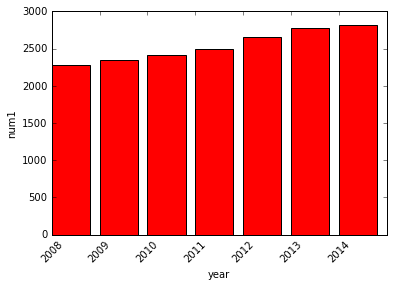

In [243]:
result =_
result.bar(color='red')
!echo '          The Number of Pontoon Over all Years';

In [244]:
%%sql
SELECT year, sum(num) as num2
FROM boating
GROUP BY year;

Done.


year,num2
2008,115520
2009,113198
2010,112337
2011,109962
2012,107608
2013,105375
2014,103584


      Overall Boating Transactions Over The Years


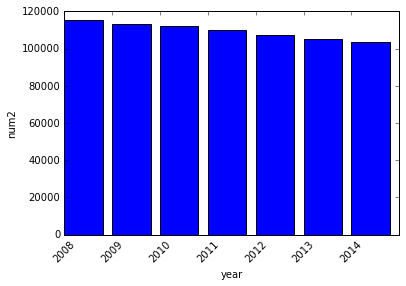

In [245]:
result =_
result.bar(color='blue')
!echo '      Overall Boating Transactions Over The Years';

In [ ]:
Response to Question 10

Based on the above tables, we can see that during 2008 to 2014, the number of Pontoon was increased. However,the number of boating transactions was decreased at the same time.


### Bonus (10 points)

Make a plot (inline, here, using python) that demonstrates one or more overall trends in boat registrations in Connecticut, drawing data directly from the database.

In [246]:
%%sql
SELECT year, SUM(num) AS 'The number of Boat Transactions in Connecticut'
FROM boating 
WHERE tx_type = 'BOAT REG ST OF CONNECTICUT'
GROUP BY year

Done.


year,The number of Boat Transactions in Connecticut
2008,19
2009,3
2010,19
2011,27
2012,48
2013,21
2014,22


           Boat Transactions in Connecticut


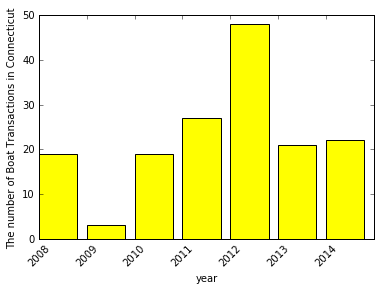

In [247]:
%matplotlib inline
result = _
result.bar(color='YELLOW')
!echo "           Boat Transactions in Connecticut"